In [67]:
import numpy as np              
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 8)   # set the width and height of plots in inches
plt.rcParams.update({'font.size': 13})     # change this value to your desired font size

Irregular Wave Train from JONSWAP Spectrum
==========================================
Generates a 6-wave irregular wave train initialized from a JONSWAP spectrum
defined by significant wave height Hs and peak period Tp.


In [78]:
Hs = 6.0        # Significant wave height [m]
Tp = 12.0       # Peak period [s]
fp = 1/Tp

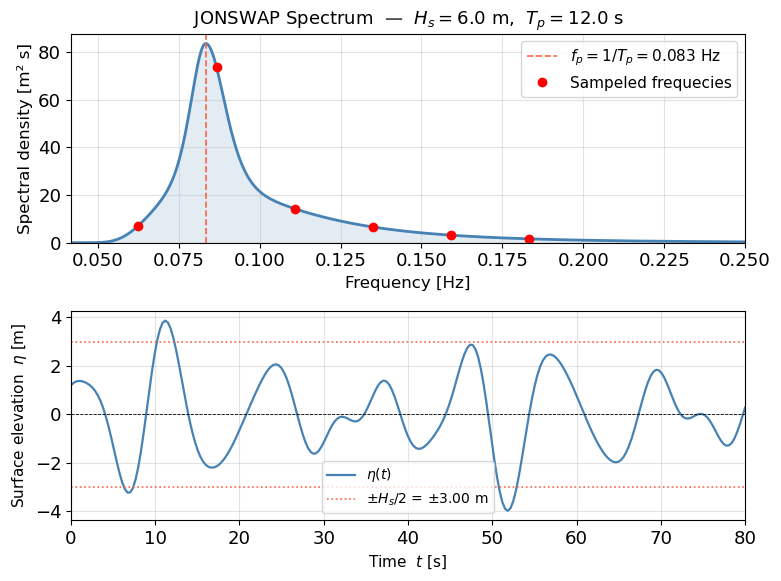

In [111]:
# Jonswap specturm
def jonswap(f, Hs, Tp, gamma=3.3):
    """
    JONSWAP wave spectrum E(f) [m² s].
    """
    fp = 1.0 / Tp
    alpha = 0.0624 / (0.230 + 0.0336*gamma - 0.185*(1.9 + gamma)**-1)
    sigma = np.where(f <= fp, 0.07, 0.09)
    r = np.exp(-0.5 * ((f - fp) / (sigma * fp))**2)
    S = (alpha * Hs**2 * fp**4 * f**-5
         * np.exp(-1.25 * (fp / f)**4)
         * gamma**r)
    return S

# Plot Jonswap
f_plot = np.linspace(0.5 * fp, 3.0 * fp, 1000)
S_plot = jonswap(f_plot, Hs, Tp)

fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": [2, 2]})

ax1 = axes[0]
ax1.plot(f_plot, S_plot, color="steelblue", lw=2)
ax1.axvline(fp, color="tomato", lw=1.2, ls="--", label=f"$f_p = 1/T_p = {fp:.3f}$ Hz")
ax1.fill_between(f_plot, S_plot, alpha=0.15, color="steelblue")
ax1.set_xlabel("Frequency [Hz]", fontsize=12)
ax1.set_ylabel("Spectral density [m² s]", fontsize=12)
ax1.set_title(f"JONSWAP Spectrum  —  $H_s = {Hs}$ m,  $T_p = {Tp}$ s", fontsize=13)
ax1.set_xlim(f_plot[0], f_plot[-1])
ax1.set_ylim(bottom=0)
ax1.grid(True, alpha=0.35)

# Sampleing frequecies
N = 6
freqs_samp = np.linspace(0.75 * fp, 2.2 * fp, N)
omegas = 2 * np.pi * freqs_samp
df = freqs_samp[1] - freqs_samp[0]
S_samp = jonswap(freqs_samp, Hs, Tp)

ax1.plot(freqs_samp, S_samp, 'ro', label='Sampeled frequecies')
ax1.legend(fontsize=11)

# Time series
T_max = 1.0 / freqs_samp[0]                    # Longest wave period [s]
t_end = 5 * T_max
dt = T_max / 50                           # ≥50 points per longest wave
t = np.arange(0, t_end + dt, dt)

# Regular waves
amplitudes = amplitudes = np.sqrt(2 * S_samp * df)
np.random.seed(42)
phases = np.random.uniform(0, 2 * np.pi, N)

# Sea-surface elevation
eta = np.zeros_like(t)
for A, omega, phi in zip(amplitudes, omegas, phases):
    eta += A * np.cos(omega * t + phi)

ax2 = axes[1]
ax2.plot(t, eta, color="steelblue", lw=1.6, label=r"$\eta(t)$")
ax2.axhline(0, color="k", lw=0.6, ls="--")
ax2.axhline( Hs / 2,  color="tomato",  lw=1.2, ls=":", label=f"±$H_s$/2 = ±{Hs/2:.2f} m")
ax2.axhline(-Hs / 2,  color="tomato",  lw=1.2, ls=":")
ax2.set_xlabel("Time  $t$ [s]", fontsize=11)
ax2.set_ylabel("Surface elevation  $\\eta$ [m]", fontsize=11)
ax2.set_xlim(t[0], t[-1])
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.35)

plt.tight_layout()
plt.savefig("figures/jonswap_spectrum.png", dpi=150, bbox_inches="tight");
plt.show()